# LIVER DISEASE PREDICTION

**In this project, we are going to use the Indian Liver Patient Records dataset from kaggle.**

**We are going to predict whether a patient has liver disease or not based on certain features.**

**We are going to check with the total proteins,albumin etc whether it is asscoiated with disease or not.**

**Importing the Necessary Libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**For the purpose of prediction, we need to import more libraries. As we move on, we will import them.**

**Reading the Dataset:**

In [2]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
patients=pd.read_csv('indian_liver_patient.csv')

In [3]:
patients.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
patients.shape

(583, 11)

**So there are 583 rows and 11 columns in our dataset.**

**Let us make the Gender column into numerical format:**

In [5]:
patients['Gender']=patients['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [6]:
patients.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


**Here there is a column named Dataset which has two values. Here one of the value symbolises that the patient has 
disease and the other value symbolises that the patient has no disease.**

**Let us check the number of male and female using a countplot.**

<AxesSubplot:>

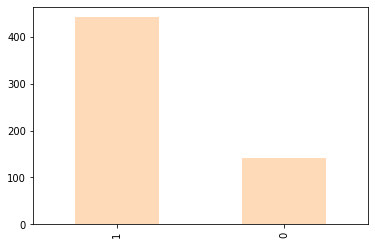

In [7]:
patients['Gender'].value_counts().plot.bar(color='peachpuff')

**From the above graph, we can see that Number of males are more than the Number of females.**

**Let us check the countplot of our Dataset column:**

<AxesSubplot:>

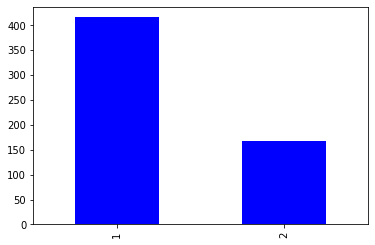

In [8]:
patients['Dataset'].value_counts().plot.bar(color='blue')

**Let us check for the null values:**

In [9]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

**We can see that there are 4 null values in the Albumin and Globulin Ratio column.**

**Let us fill these null values by imputing the mean of that column.**

In [10]:
patients['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815201

In [11]:
patients=patients.fillna(0.94)

**Yes! Now we have filled the null values with the mean of that column.** 

In [12]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

**So we have removed all the null values and we are ready to go !**

**Let us check the age group of the patients.**

<AxesSubplot:>

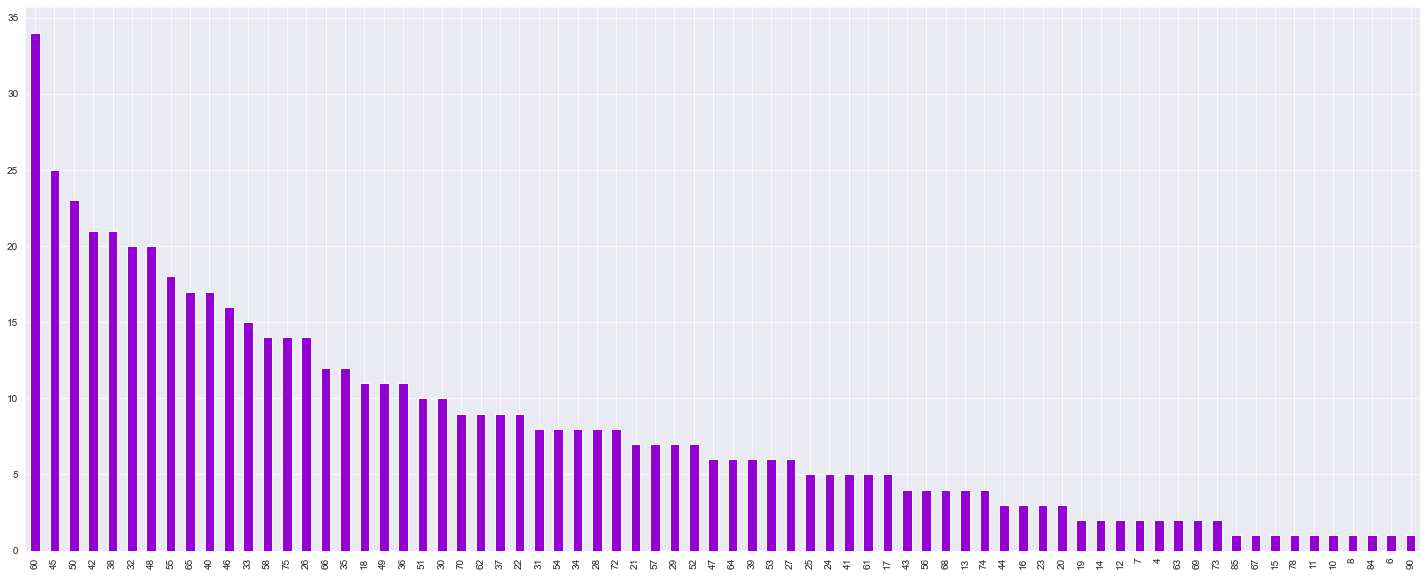

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
patients['Age'].value_counts().plot.bar(color='darkviolet')

**Let us view the pairplot of patients based on Gender.**

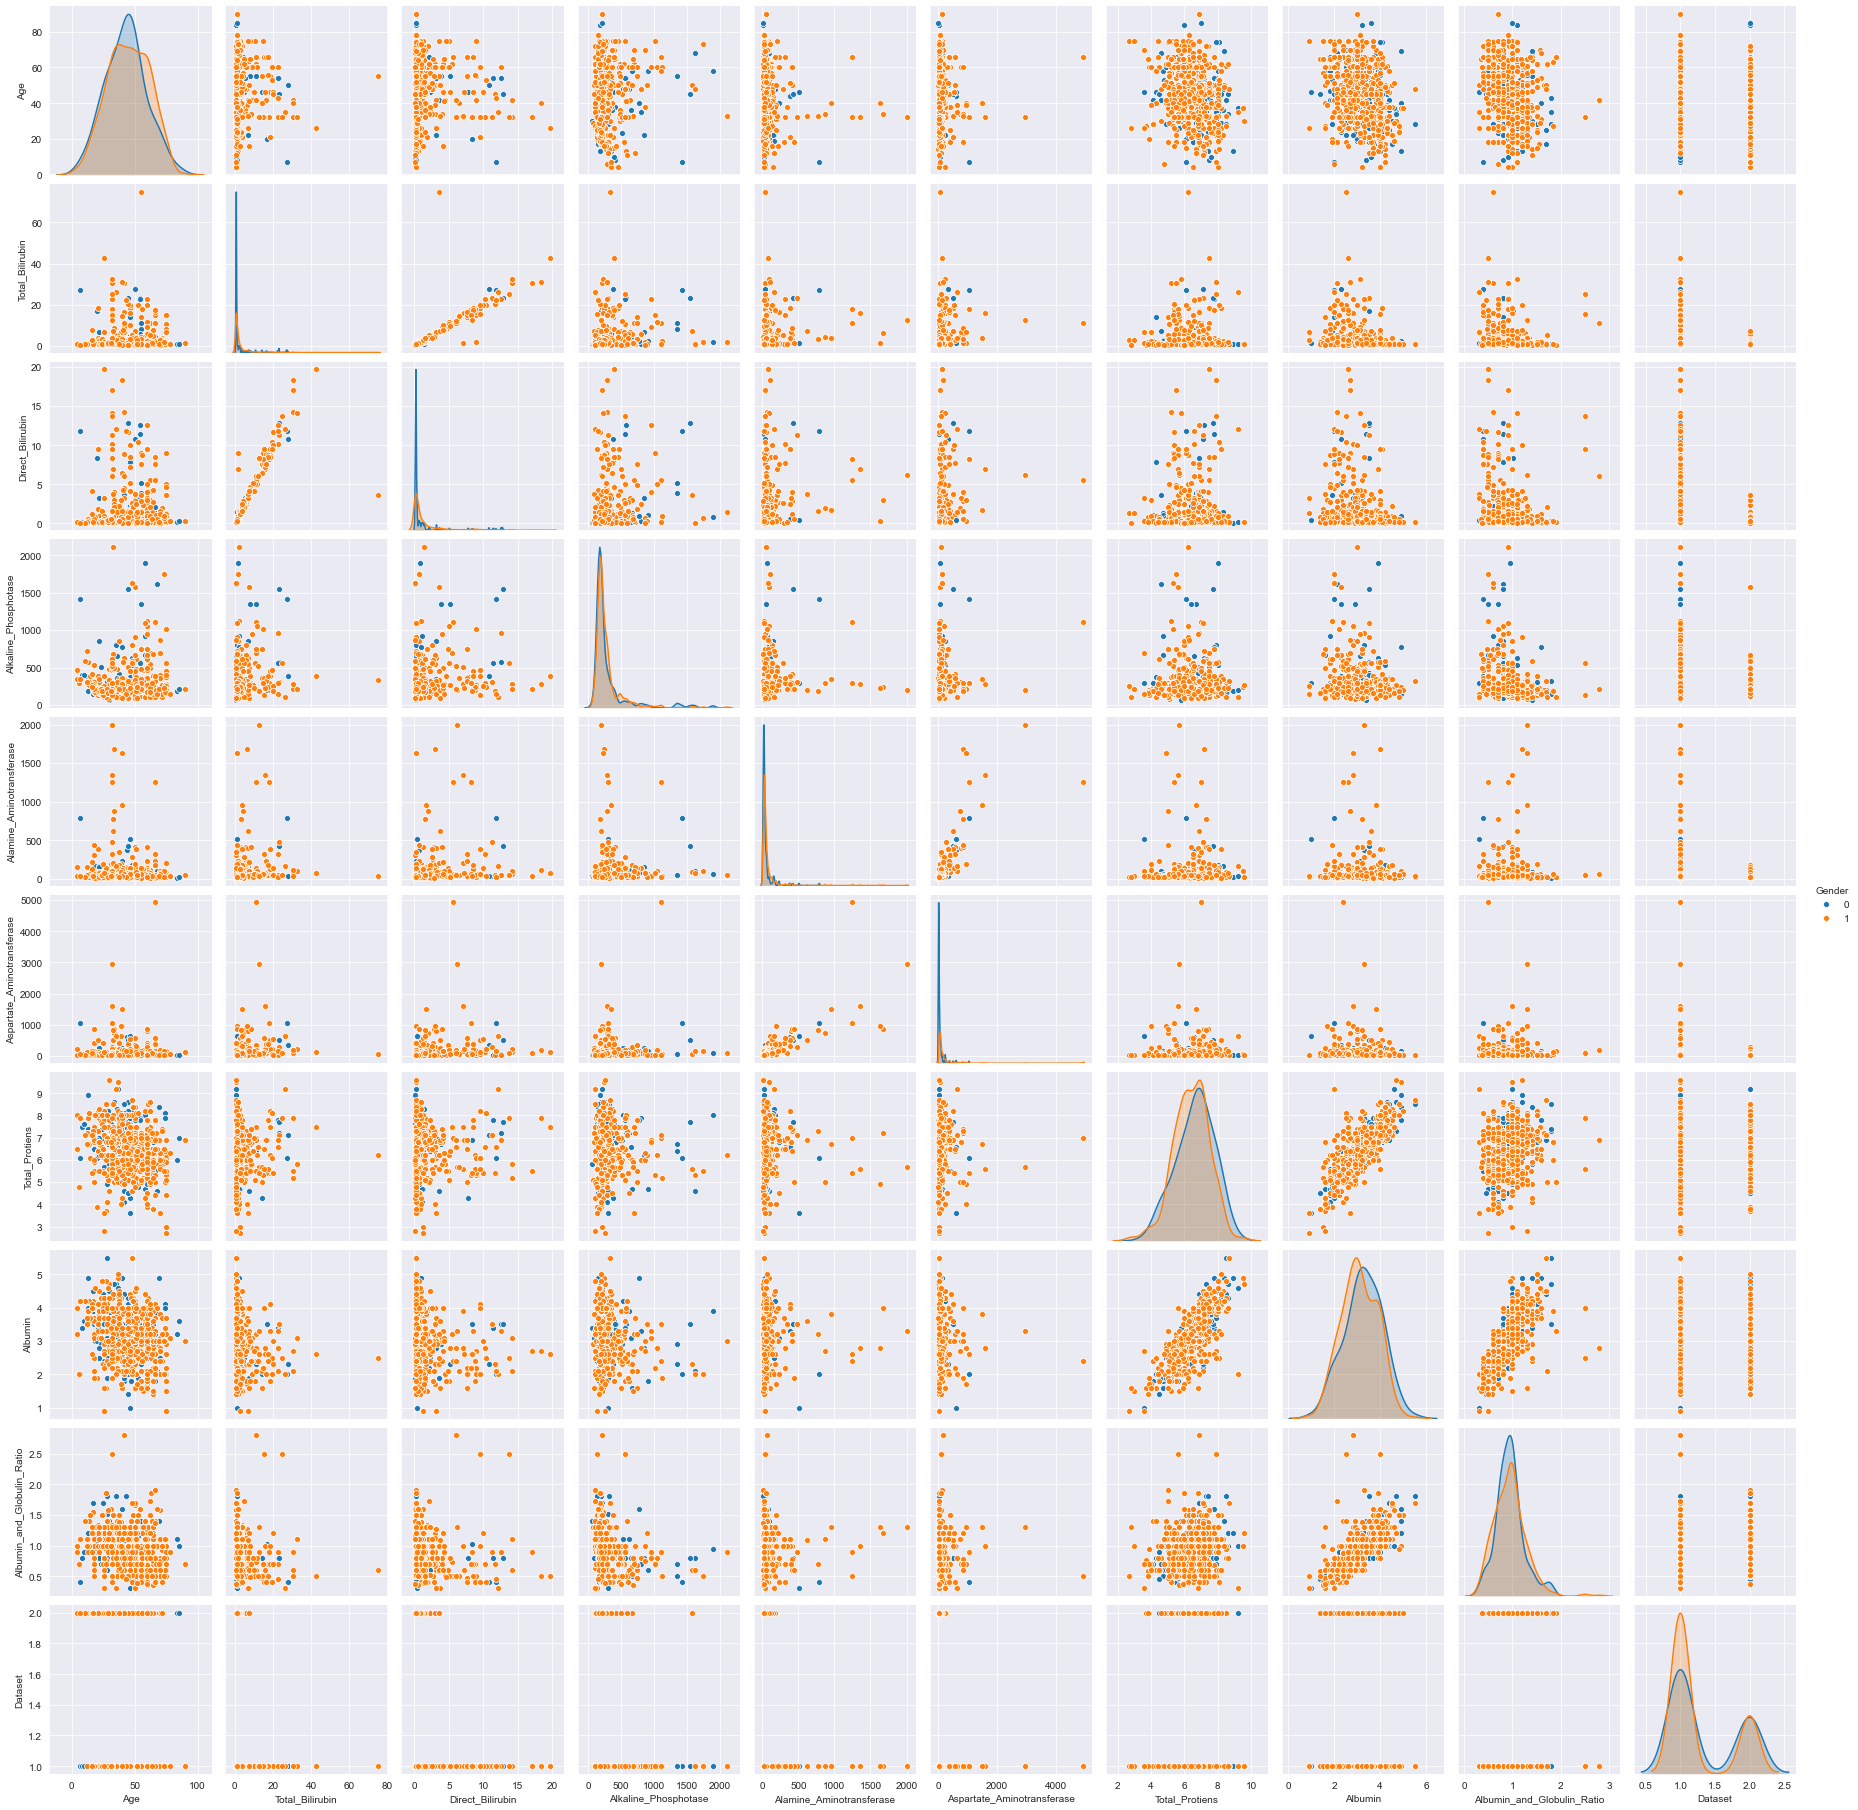

In [14]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(patients,hue='Gender')

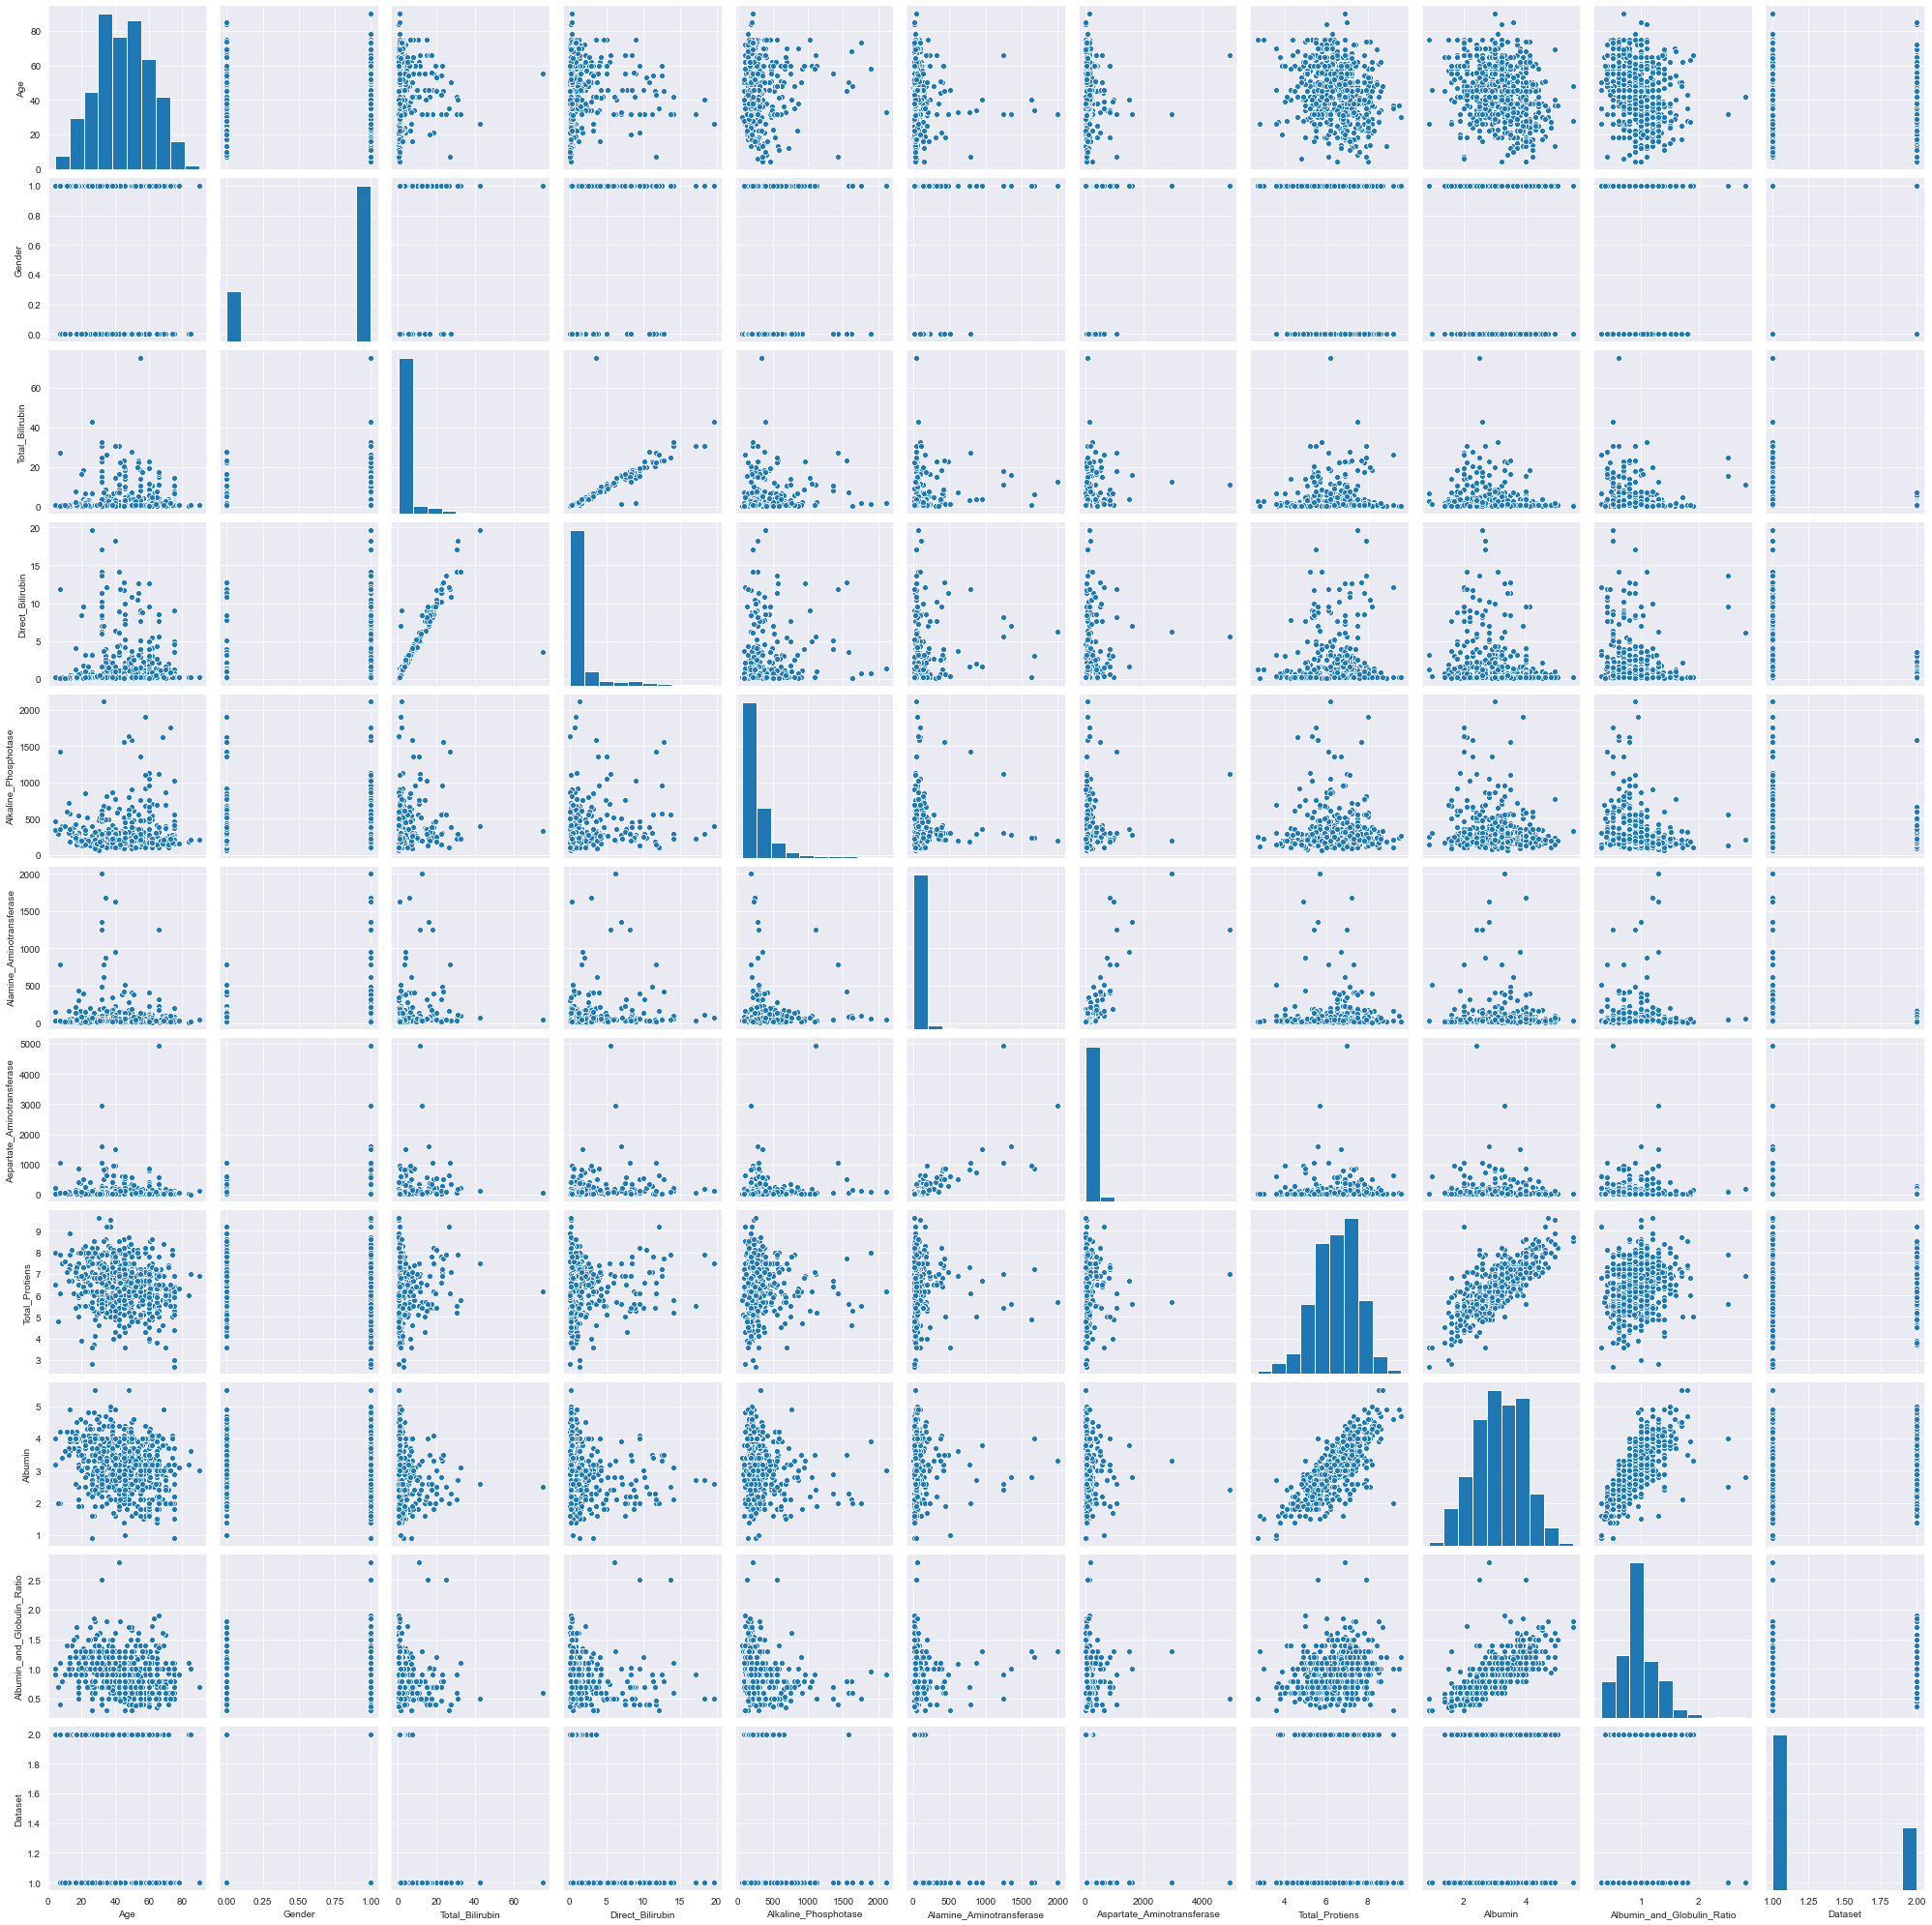

In [15]:
sns.pairplot(patients)

**Let us compare the albumin and albumin and globulin ratio by a scatterplot.**

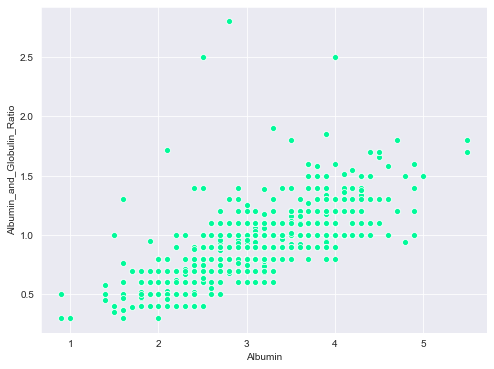

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='mediumspringgreen',data=patients);
plt.show()

**Let us compare the Gender based on the Protein Intake.**

<AxesSubplot:xlabel='Gender'>

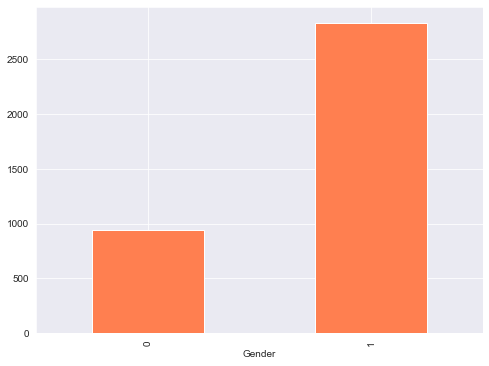

In [17]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='coral')

**So protein intake is higher in the case of Male and comparitively less in females.**

**Let us compare male and female based on Albumin Level.**

<AxesSubplot:xlabel='Gender'>

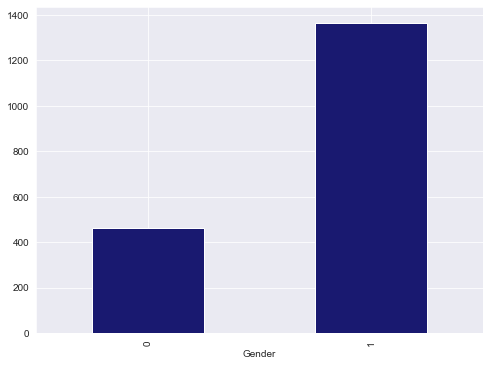

In [18]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')

**Albumin Level is higher in the case in the case of male compared to female.**

**Finally Let us compare them based on the Bilirubin content.**

<AxesSubplot:xlabel='Gender'>

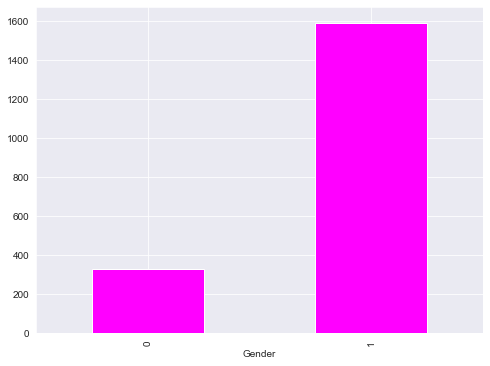

In [19]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='fuchsia')

**We can clearly see that males has more bilirubin content compared to females.**

**Another point to be noted here is that higher the Bilirubin content, higher the case is prone to Liver disease.**

**Let us check the correlation between the features using a heatmap:**

In [20]:
corr=patients.corr()

<AxesSubplot:>

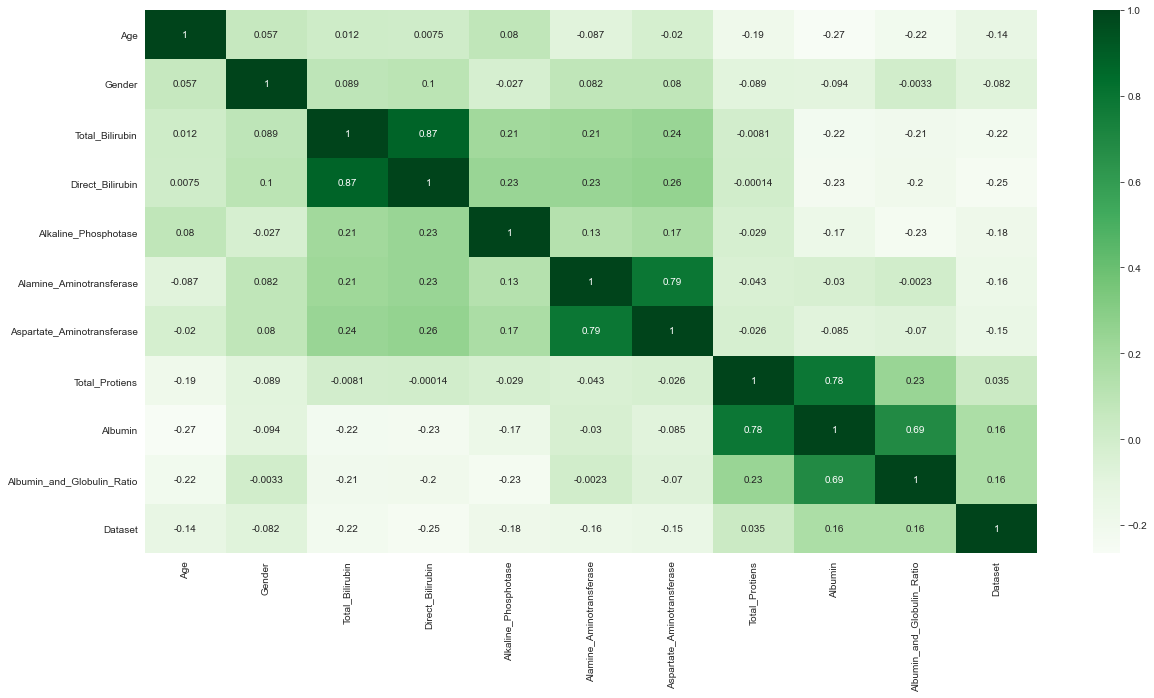

In [21]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

**So Let us start building our model.**

**Inorder to build a successful model we have to train and test the model.**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
patients.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

**Now let us define our X and y.**

**Here X is our features and y is our target.**

In [24]:
X=patients[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']]
y=patients['Dataset']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

**We split the training and testing  in a certain ratio as 70 for training and 30 for testing.**

**Now inorder to build our model we use Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

**Now, Let us import the cross validation score and Kfold and split them into 5.**

**Finally, we are calculating the accuracy of our model.**

In [27]:
y_pred = logmodel.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

cm_test

array([[119,  41],
       [  7,   8]], dtype=int64)

In [32]:
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for test set for Logistic Regression = 0.7257142857142858


**Thus we can conclude that our model performed at an accuracy of 72.5%.**

In [30]:
import pickle

In [31]:
pickle.dump(logmodel, open('model_liver.pkl','wb'))
model = pickle.load(open('model_liver.pkl','rb'))